In [ ]:
# %pip install llama-index
# %pip install tiktoken
# %pip install openai
# %pip install networkx
# !python -m pip install -U matplotlib

In [9]:
prompt = """Given the current state of a graph and a prompt, extrapolate as many relationships as possible from the prompt and update the state of the above Article. Avoid stopwords.

Every node has an id, label.
Every edge has a to and from with node ids, and a label.
Edges are directed, so the order of the from and to is important.

# Definition
- Node: Entity or Object that performs the action or has a relationship with another entity or object.
- Edge: A relationship between two nodes, action or attribute that is attributed to the subject or describes the relationship between the subject and the object.
- Label: A string that describes the relationship between two nodes.

# Examples
current state:
{ "nodes": [ { "id": 1, "label": "Bob" } ], "edges": [] }

prompt: Alice is Bob's roommate.

new state:
{ "nodes": [ { "id": 1, "label": "Bob"}, { "id": 2, "label": "Alice" } ], "edges": [ { "from": 1, "to": 2, "label": "roommate" } ] }

current state: $state

prompt: $prompt

new state:
"""

In [10]:
file="testing_text.txt"

with open(file, 'r') as file:
  original_document = file.read()

words = original_document.lower().split()

test_words_start = 150 # join the first 150 words
test_words_end = 300

document = ' '.join(words[test_words_start:test_words_end])

print(document)

study the opti- mization problem of choosing optimal pipelines based on input sentences. to do so, we train a transformer-based classification model that extracts contextual embeddings from the input and finds an appropriate pipeline. we study the efficacy of plumber for extracting the kg triples using standard datasets over three kgs: dbpedia, wikidata, and open research knowledge graph. our results demonstrate the effectiveness of plumber in dynamically generating kg completion pipelines, outperforming all baselines agnostic of the underlying kg. furthermore, we provide an analysis of collective failure cases, study the similarities and synergies among integrated components and discuss their limitations. keywords information extraction · nlp pipelines · software reusability · semantic search · semantic web 1 introduction since the early twenty-first century [8], there have been continuous efforts to extend the web with a global data graph using the resource data framework (rdf) to pu

In [11]:
from llama_index.core import Document, Settings
from llama_index.core.node_parser import SentenceSplitter
import tiktoken
from dotenv import load_dotenv
import os

load_dotenv()

openai_api_key = os.environ.get('OPENAI_API_KEY')

enc = tiktoken.get_encoding("cl100k_base")
text_list = [original_document]
documents = [Document(text=t) for t in text_list]

splitter = SentenceSplitter(chunk_size=1024,chunk_overlap=50)

nodes = splitter.get_nodes_from_documents(documents)

def tokenize(text: str):
  return len(enc.encode(text))

print(len(nodes), 'Nodes')
print('\n')
total_tokens = 0

for i, node in enumerate(nodes):
  tokens = tokenize(node.text)
  total_tokens += tokens
  print('Node Nº', i+1, f'| {tokens} Tokens')
  print(node.text)
  print('\n')

print('Total Tokens:', total_tokens)

16 Nodes


Node Nº 1 | 977 Tokens
Information extraction pipelines for knowledge graphs Mohamad Yaser Jaradeh 1 · Kuldeep Singh 2 · Markus Stocker3 · Andreas Both 4 · Sören Auer3 Received: 29 September 2021 / Revised: 16 December 2022 / Accepted: 25 December 2022 / Published online: 7 January 2023 © The Author(s) 2023 Abstract In the last decade, a large number of knowledge graph (KG) completion approaches were pro- posed. Albeit effective, these efforts are disjoint, and their collective strengths and weaknesses in effective KG completion have not been studied in the literature. We extend Plumber, a framework that brings together the research community’s disjoint efforts on KG completion. We include more components into the architecture of Plumber to comprise 40 reusable com- ponents for various KG completion subtasks, such as coreference resolution, entity linking, and relation extraction. Using these components, Plumber dynamically generates suitable knowledge extraction pipelines a

In [13]:
def get_triples(document, model):

    from openai import OpenAI

    client = OpenAI(
        api_key=openai_api_key
    )
    chat_completion = client.chat.completions.create(
        messages=[
            {
                "role": "system",
                "content": f"{prompt}\n\n# ARTICLE\n\n{document}"
            }
        ],
        model=model,
        temperature=0,
        # response_format={
        #     "type": "json_object",
        # }
        # max_tokens=2000,
    )

    return chat_completion


gpt_4 = []

gpt_4.append(
    get_triples(
        nodes[0].text,
        "gpt-4-0125-preview"
    )
)

print(gpt_4) # 40.4s

[ChatCompletion(id='chatcmpl-95kuBTGjvrzmll7JG1znQTq75SYHE', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='current state:\n{\n  "nodes": [],\n  "edges": []\n}\n\nprompt: Mohamad Yaser Jaradeh works at L3S Research Center and is associated with Leibniz University Hannover. Kuldeep Singh is part of Zerotha-Research and Cerence GmbH, located in Aachen, Germany. Markus Stocker and Sören Auer are affiliated with TIB Leibniz Information Centre for Science and Technology in Hanover, Germany. Andreas Both works at Anhalt University of Applied Sciences in Bernburg, Germany.\n\nnew state:\n{\n  "nodes": [\n    { "id": 1, "label": "Mohamad Yaser Jaradeh" },\n    { "id": 2, "label": "L3S Research Center" },\n    { "id": 3, "label": "Leibniz University Hannover" },\n    { "id": 4, "label": "Kuldeep Singh" },\n    { "id": 5, "label": "Zerotha-Research" },\n    { "id": 6, "label": "Cerence GmbH" },\n    { "id": 7, "label": "Aachen, Germany" },\n 

In [14]:
response = gpt_4[0].choices[0].message.content

print(response)

current state:
{
  "nodes": [],
  "edges": []
}

prompt: Mohamad Yaser Jaradeh works at L3S Research Center and is associated with Leibniz University Hannover. Kuldeep Singh is part of Zerotha-Research and Cerence GmbH, located in Aachen, Germany. Markus Stocker and Sören Auer are affiliated with TIB Leibniz Information Centre for Science and Technology in Hanover, Germany. Andreas Both works at Anhalt University of Applied Sciences in Bernburg, Germany.

new state:
{
  "nodes": [
    { "id": 1, "label": "Mohamad Yaser Jaradeh" },
    { "id": 2, "label": "L3S Research Center" },
    { "id": 3, "label": "Leibniz University Hannover" },
    { "id": 4, "label": "Kuldeep Singh" },
    { "id": 5, "label": "Zerotha-Research" },
    { "id": 6, "label": "Cerence GmbH" },
    { "id": 7, "label": "Aachen, Germany" },
    { "id": 8, "label": "Markus Stocker" },
    { "id": 9, "label": "Sören Auer" },
    { "id": 10, "label": "TIB Leibniz Information Centre for Science and Technology" },
    { "id

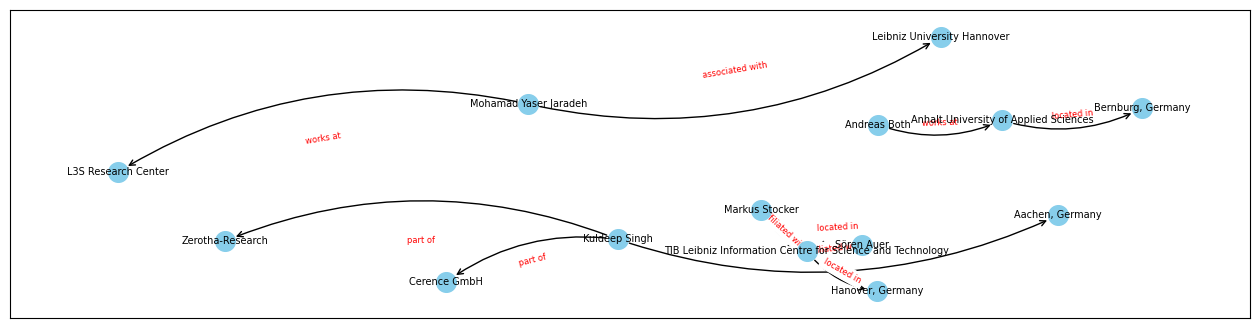

In [31]:
# [{'id': 1, 'label': 'Mohamad Yaser Jaradeh', 'color': '#ffffff'}, {'id': 2, 'label': 'L3S Research Center', 'color': '#ffffff'}, {'id': 3, 'label': 'Leibniz University Hannover', 'color': '#ffffff'}, {'id': 4, 'label': 'Kuldeep Singh', 'color': '#ffffff'}, {'id': 5, 'label': 'Zerotha-Research', 'color': '#ffffff'}, {'id': 6, 'label': 'Cerence GmbH', 'color': '#ffffff'}, {'id': 7, 'label': 'Aachen, Germany', 'color': '#ffffff'}, {'id': 8, 'label': 'Markus Stocker', 'color': '#ffffff'}, {'id': 9, 'label': 'Sören Auer', 'color': '#ffffff'}, {'id': 10, 'label': 'TIB Leibniz Information Centre for Science and Technology', 'color': '#ffffff'}, {'id': 11, 'label': 'Hanover, Germany', 'color': '#ffffff'}, {'id': 12, 'label': 'Andreas Both', 'color': '#ffffff'}, {'id': 13, 'label': 'Anhalt University of Applied Sciences', 'color': '#ffffff'}, {'id': 14, 'label': 'Bernburg, Germany', 'color': '#ffffff'}]
# [{'from': 1, 'to': 2, 'label': 'works at'}, {'from': 1, 'to': 3, 'label': 'associated with'}, {'from': 4, 'to': 5, 'label': 'involved with'}, {'from': 4, 'to': 6, 'label': 'involved with'}, {'from': 4, 'to': 7, 'label': 'located in'}, {'from': 8, 'to': 10, 'label': 'part of'}, {'from': 9, 'to': 10, 'label': 'part of'}, {'from': 10, 'to': 11, 'label': 'located in'}, {'from': 12, 'to': 13, 'label': 'works at'}, {'from': 13, 'to': 14, 'label': 'located in'}]

import json

response = gpt_4[0].choices[0].message.content
response = response.split('new state:')

# to json
response = json.loads(response[1])


import matplotlib.pyplot as plt
import networkx as nx

id_to_label = {node['id']: node['label'] for node in response['nodes']}

G = nx.DiGraph()

for node in response['nodes']:
    G.add_node(node['label'])

for edge in response['edges']:
    G.add_edge(id_to_label[edge['from']], id_to_label[edge['to']], label=edge['label'])

pos = nx.spring_layout(G)

plt.figure(figsize=(16, 4))

# Draw the edges
nx.draw_networkx_edges(
    G,
    pos,
    edge_color='black',
    width=1,
    edge_cmap=plt.cm.Blues,
    arrowstyle='->',
    connectionstyle='arc3, rad = 0.2',
    arrowsize=10
)

edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(
    G,
    pos,
    edge_labels=edge_labels,
    font_color='red',
    font_size=6
)
# Draw the nodes (after the edges)
nx.draw_networkx_nodes(
    G,
    pos,
    node_size=200,
    node_color='skyblue'
)

# Draw the node labels
nx.draw_networkx_labels(
    G,
    pos,
    labels={node: node for node in G.nodes()},
    font_size=7,
    font_color='black'
)
plt.show()

